In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

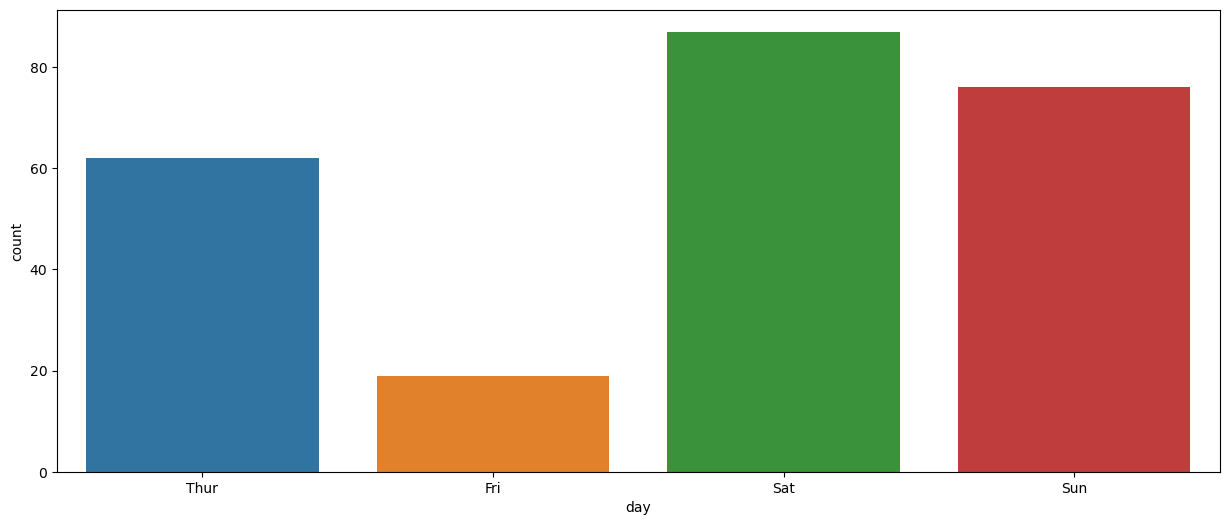

In [5]:
plt.rcParams["figure.figsize"] = (15,6)
sns.countplot(x="day", data=tips);

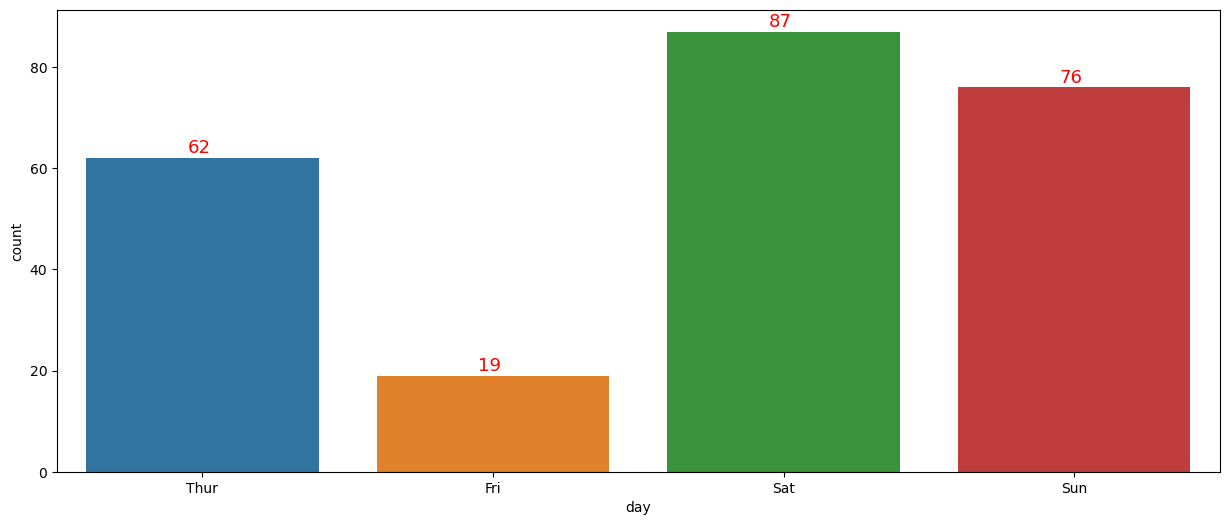

In [6]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data=tips)
# print(ax.patches[2].get_height())

for p in ax.patches:
    ax.annotate(round(p.get_height()),
               (p.get_x()+0.35, p.get_height()+1),
               color="red",
               size=13)

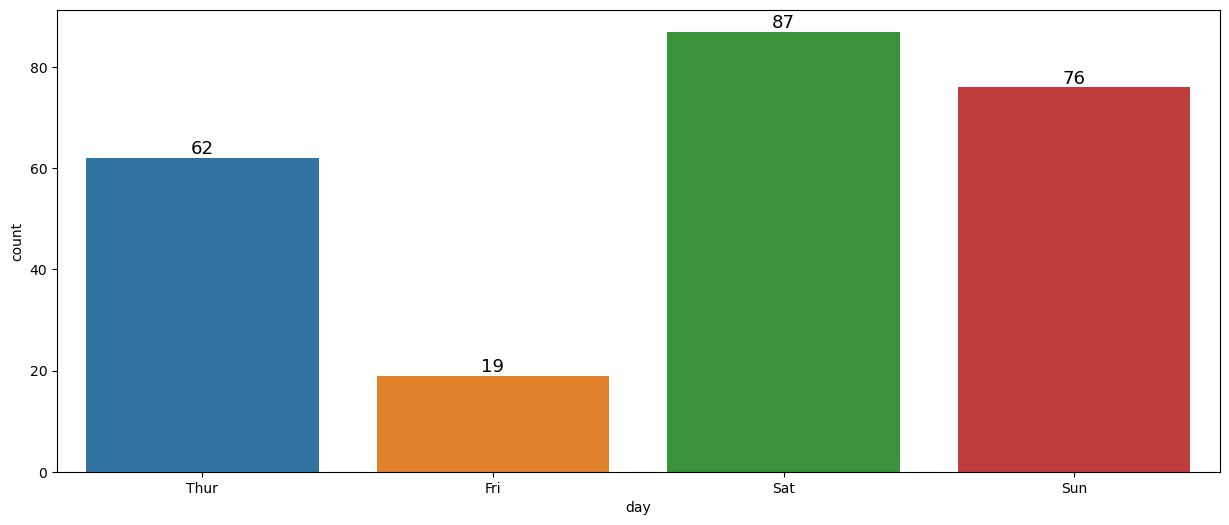

In [14]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data=tips)
# print(ax.containers[0])
ax.bar_label(ax.containers[0], size = 13);

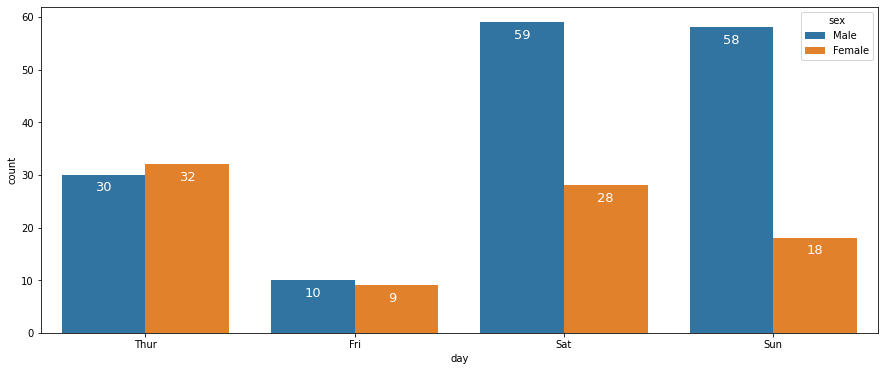

In [35]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data=tips, hue="sex")
# print(ax.patches[2].get_height())

for p in ax.patches:
    ax.annotate(round(p.get_height()),
               (p.get_x()+0.16, p.get_height()-3),
               color="white",
               size=13)

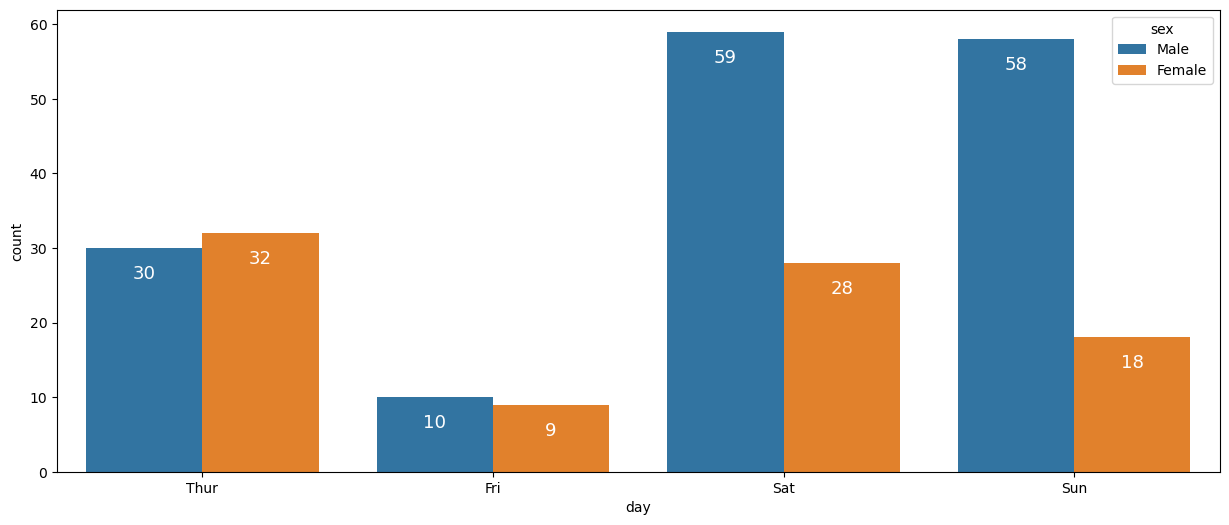

In [19]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data=tips, hue="sex")
# print(ax.containers[0])
ax.bar_label(ax.containers[0], size = 13, padding=-25, color="white")
ax.bar_label(ax.containers[1], size = 13, padding=-25, color="white");

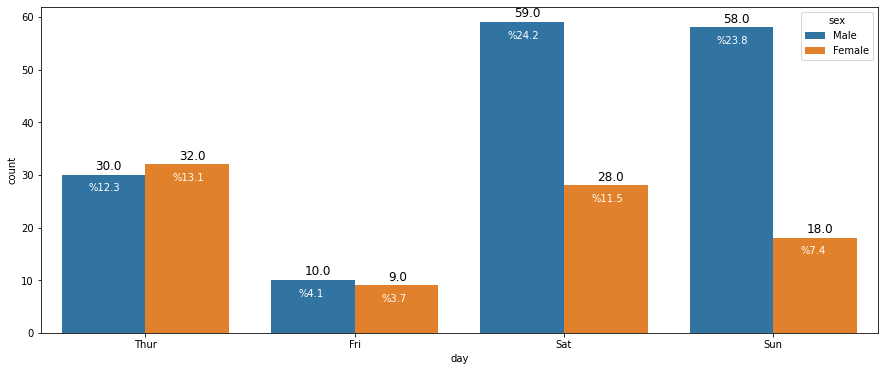

In [37]:
fig, ax = plt.subplots()
ax = sns.countplot(x='day', data=tips, hue="sex")

for p in ax.patches:
    ax.annotate(p.get_height(),
                (p.get_x()+0.16, p.get_height()+1),
                size=12)
    
    ax.text(p.get_x()+0.13, p.get_height()-3, "%"+str(round(100*p.get_height()/tips.day.count(),1)), color="white")
    

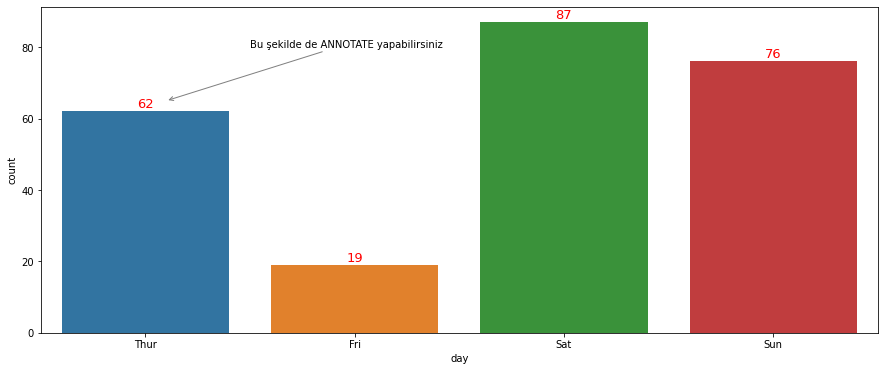

In [42]:
fig, ax = plt.subplots()
ax = sns.countplot(x='day', data=tips)

for p in ax.patches:
    ax.annotate(round(p.get_height()),
               (p.get_x()+0.36, p.get_height()+1),
               size=13,
               color="red")
    
ax.annotate("Bu şekilde de ANNOTATE yapabilirsiniz", 
            xy=(0.1, 65), 
            xytext=(0.5, 80), 
            arrowprops={"arrowstyle":"->", "color":"gray"});

In [43]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


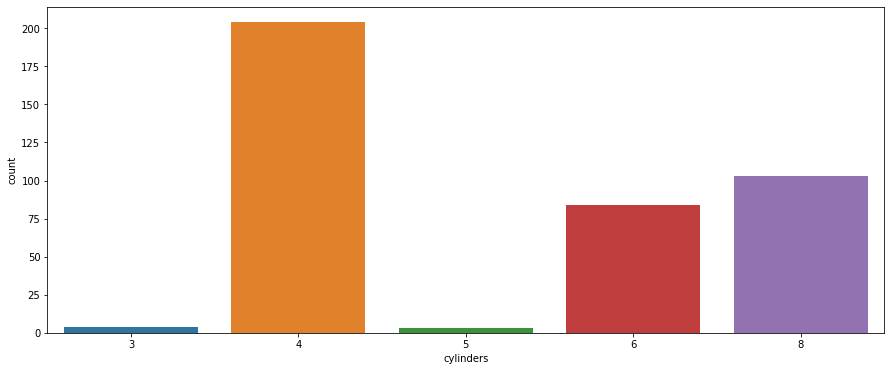

In [44]:
sns.countplot(x="cylinders", data=mpg);

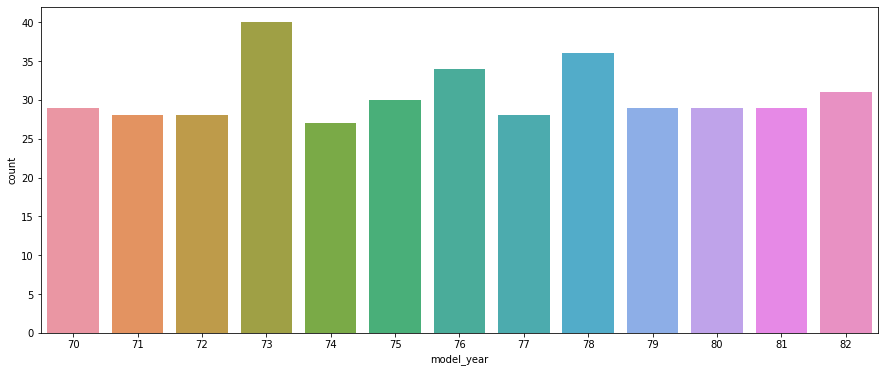

In [45]:
sns.countplot(x="model_year", data=mpg);

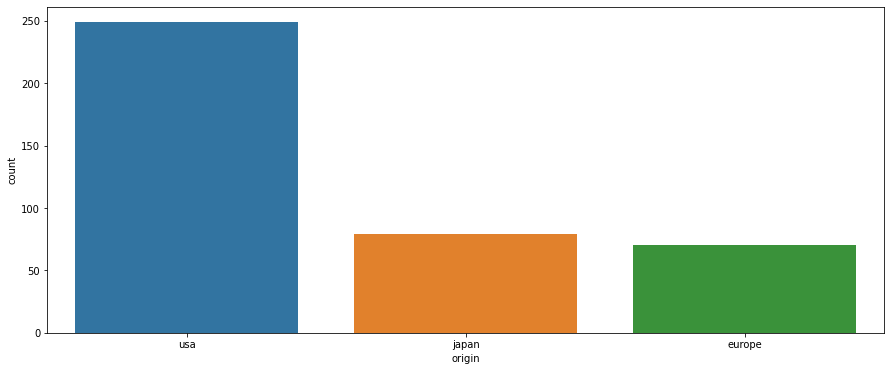

In [46]:
sns.countplot(x="origin", data=mpg);

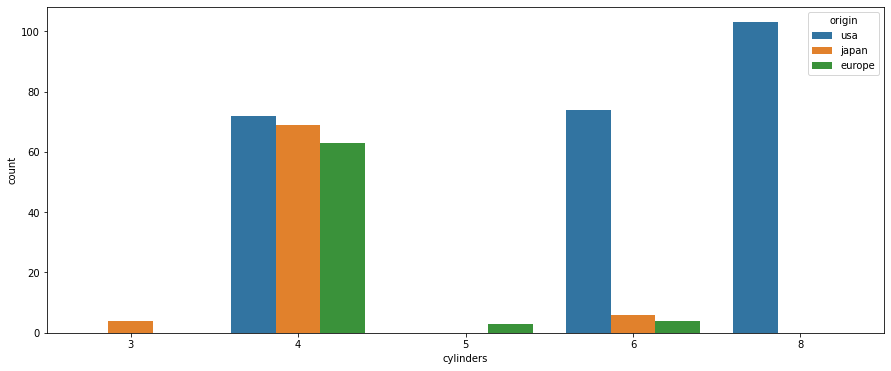

In [47]:
sns.countplot(x="cylinders", hue="origin", data=mpg);

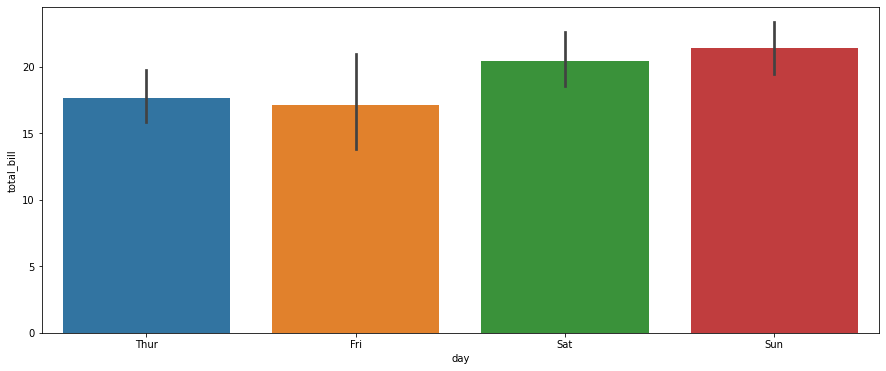

In [49]:
sns.barplot(data=tips, x="day", y="total_bill");

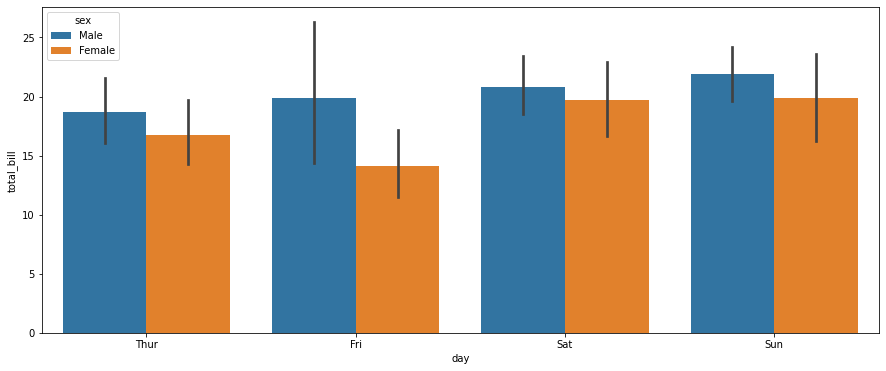

In [50]:
sns.barplot(data=tips, x="day", y="total_bill", hue="sex");

!pip install seaborn --upgrade --user

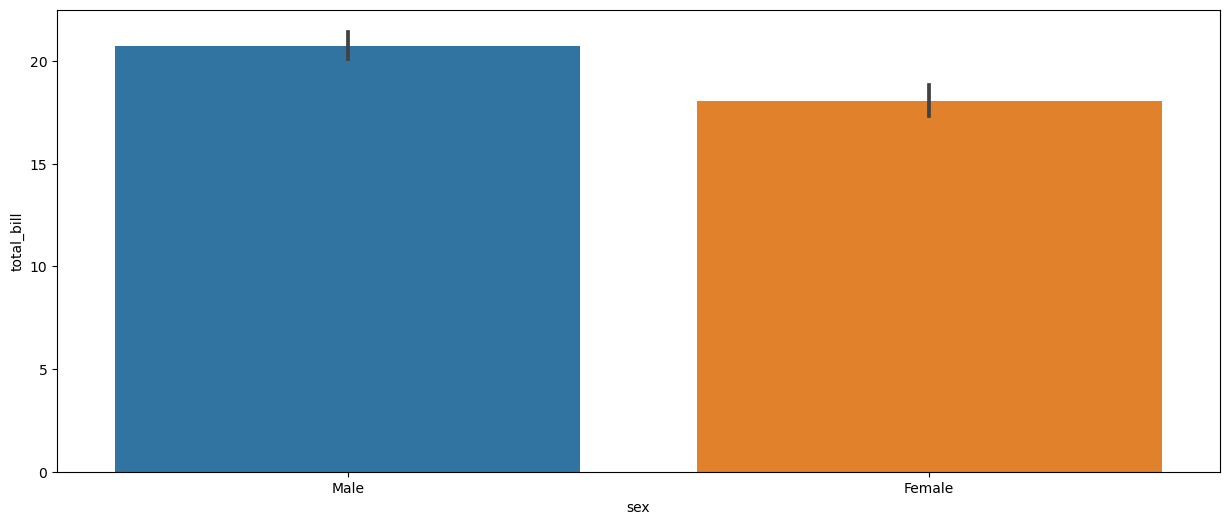

In [20]:
sns.barplot(x="sex", y="total_bill", data=tips, errorbar=('ci', 65));

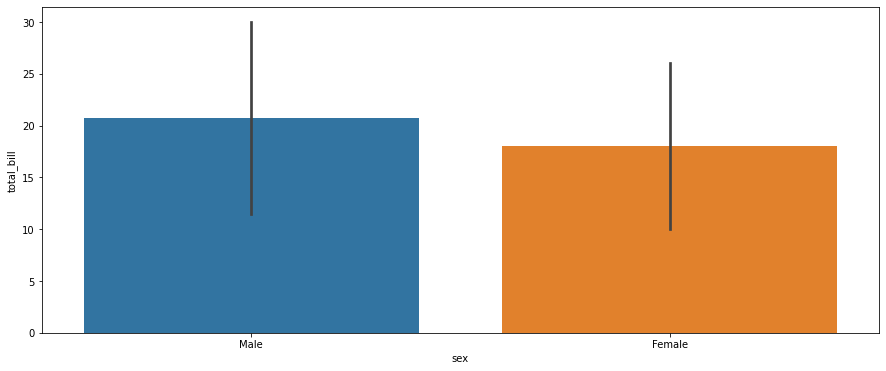

In [56]:
sns.barplot(x="sex", y="total_bill", data=tips, errorbar="sd");

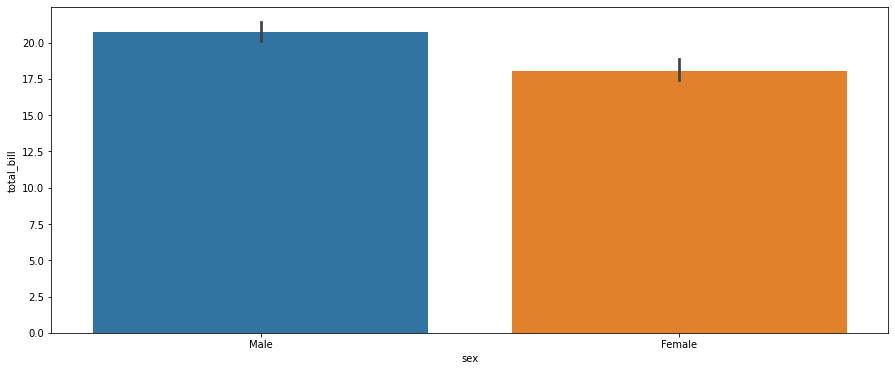

In [57]:
sns.barplot(x="sex", y="total_bill", data=tips, errorbar=('ci', 60));

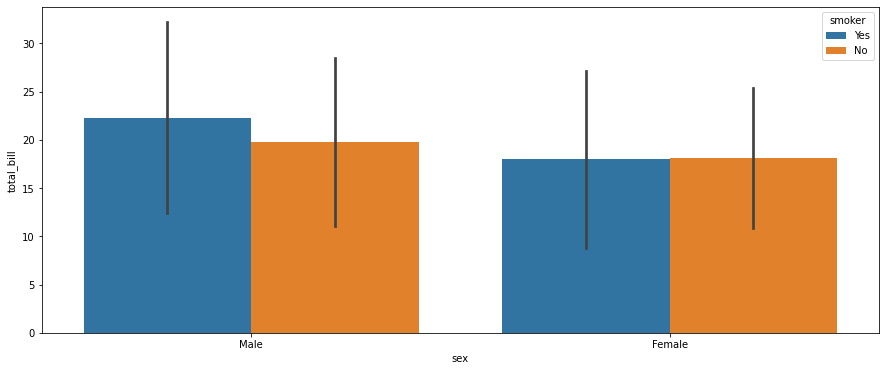

In [58]:
sns.barplot(x="sex", y="total_bill", data=tips, errorbar="sd", hue="smoker");

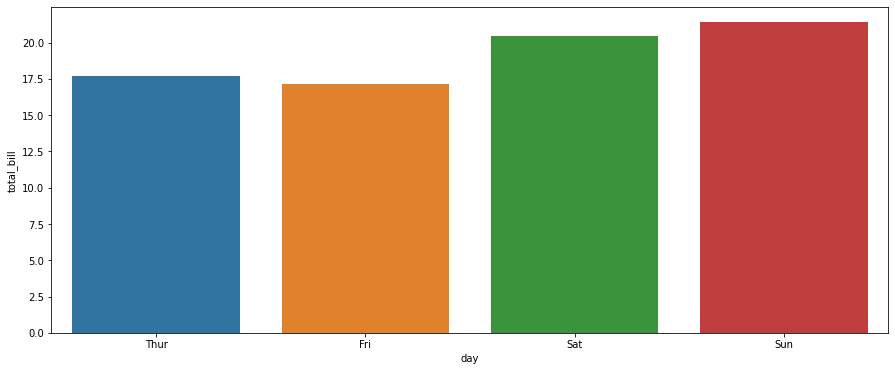

In [60]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=None);

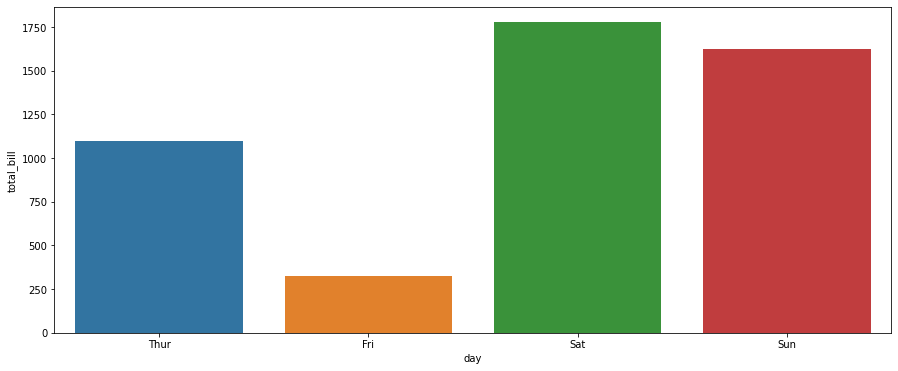

In [61]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=None, estimator= np.sum);

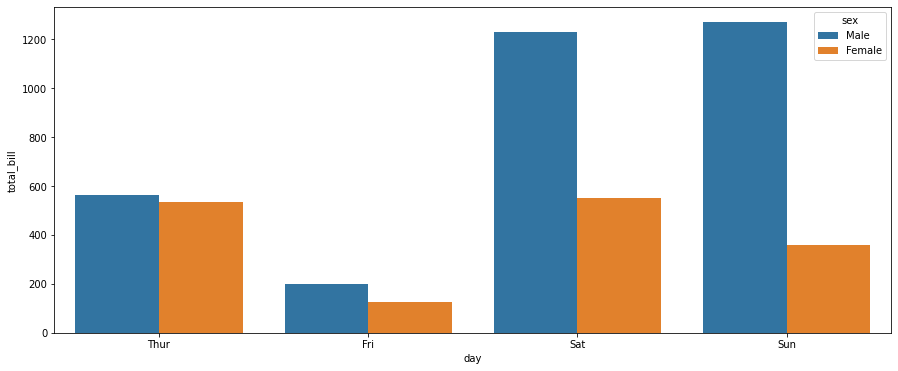

In [62]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=None, estimator= np.sum, hue="sex");

In [64]:
tips.groupby(["day", "sex"])["total_bill"].sum()

day   sex   
Thur  Male       561.44
      Female     534.89
Fri   Male       198.57
      Female     127.31
Sat   Male      1227.35
      Female     551.05
Sun   Male      1269.46
      Female     357.70
Name: total_bill, dtype: float64

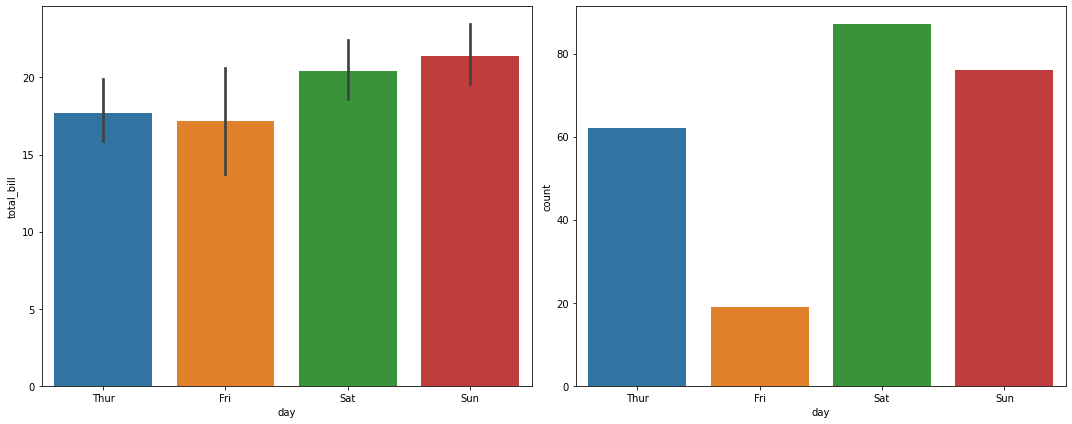

In [67]:
fig, ax = plt.subplots(1,2)

sns.barplot(x="day", y="total_bill", data=tips, ax=ax[0] )
sns.countplot(x="day", data=tips, ax=ax[1])

plt.tight_layout()

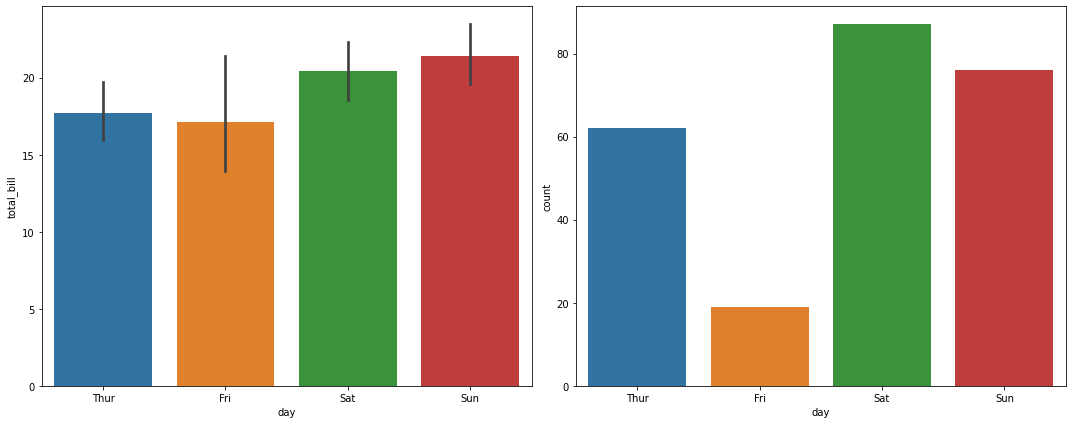

In [68]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.barplot(x="day", y="total_bill", data=tips, ax=ax1 )
sns.countplot(x="day", data=tips, ax=ax2)

plt.tight_layout()

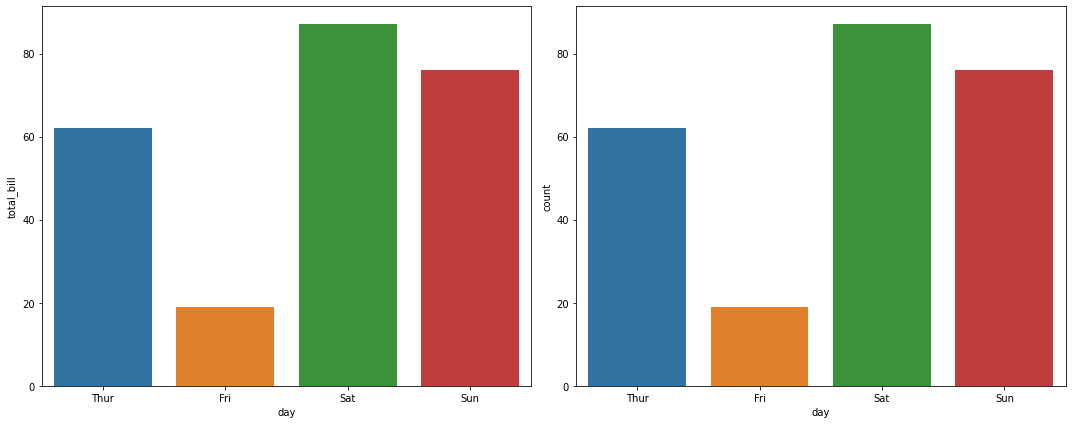

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.barplot(x="day", y="total_bill", data=tips, ax=ax1, estimator=np.count_nonzero)
sns.countplot(x="day", data=tips, ax=ax2)

plt.tight_layout()

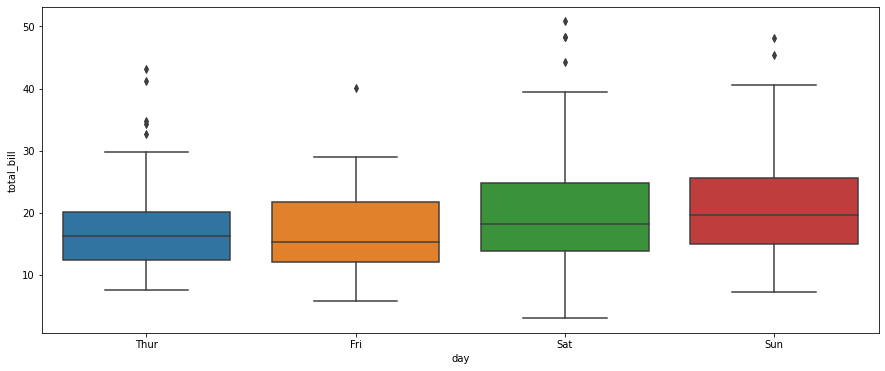

In [70]:
sns.boxplot(x="day", y="total_bill", data=tips);

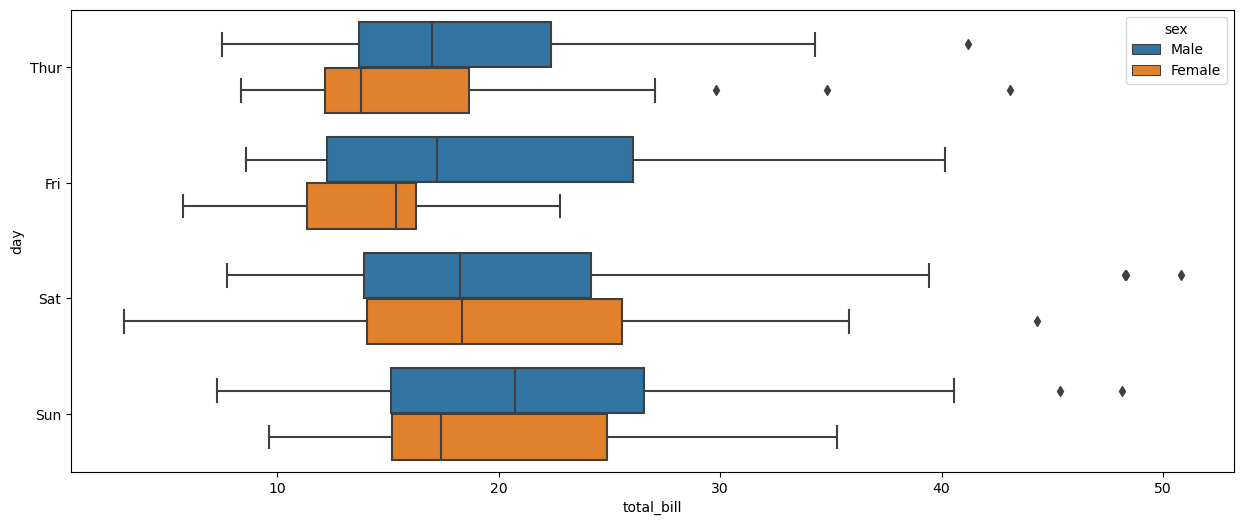

In [22]:
sns.boxplot(y="day", x="total_bill", data=tips, hue="sex");


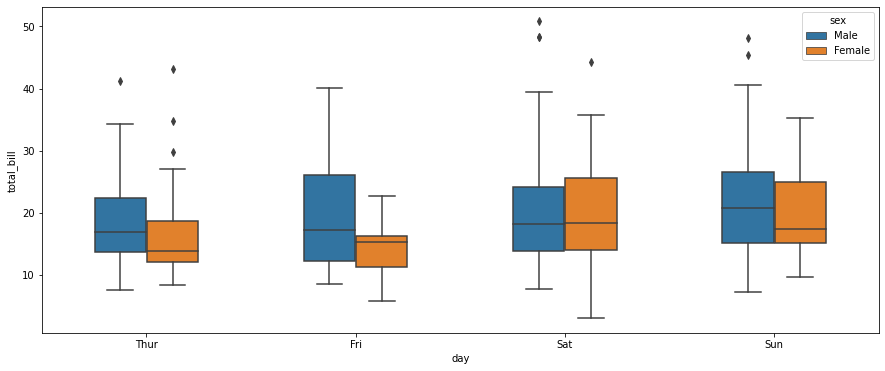

In [75]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex", width=0.5);

In [77]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


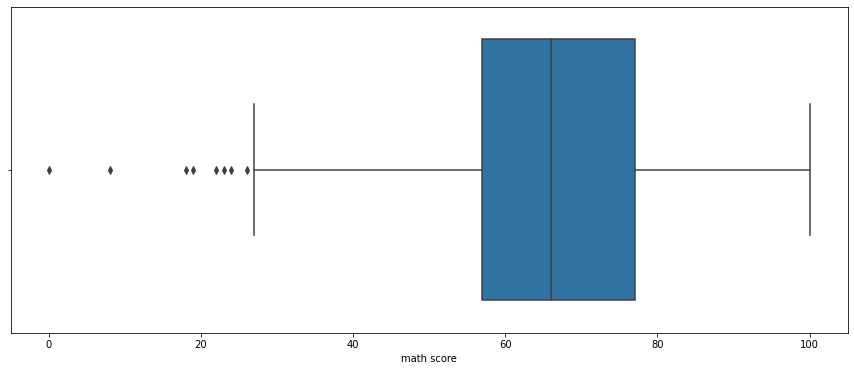

In [78]:
sns.boxplot(x="math score", data=df);

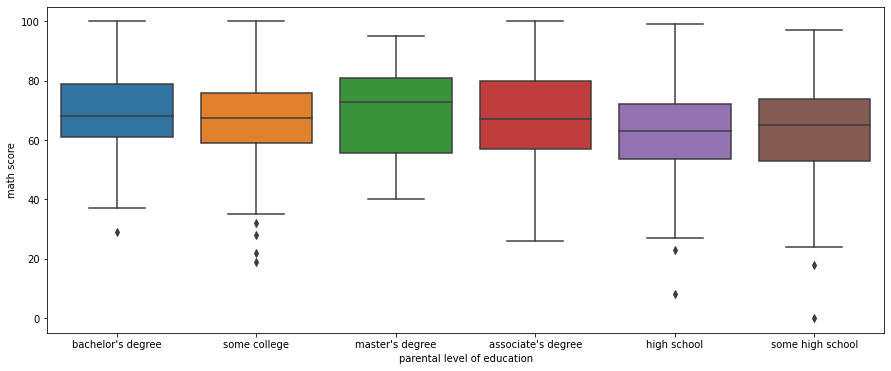

In [79]:
sns.boxplot(y="math score", data=df, x="parental level of education");

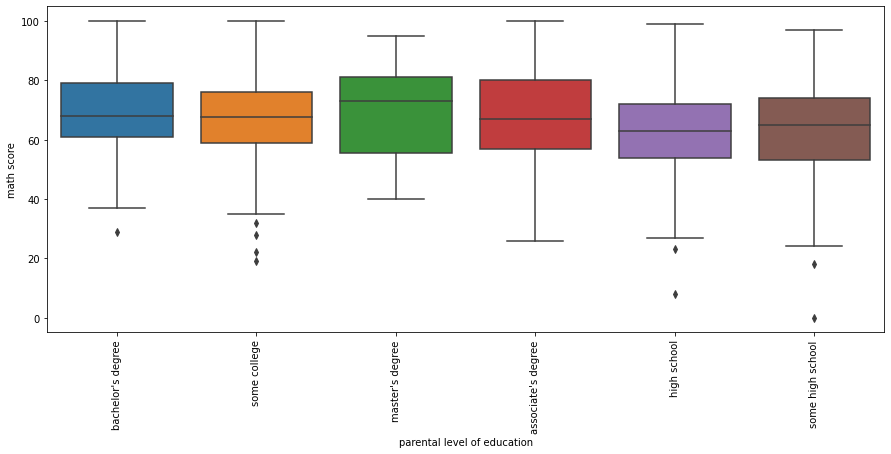

In [81]:
sns.boxplot(y="math score", data=df, x="parental level of education")
plt.xticks(rotation=90);

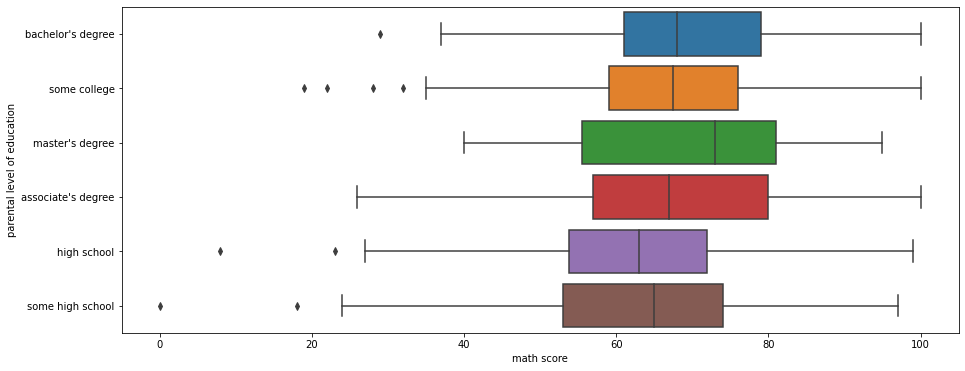

In [82]:
sns.boxplot(x="math score", data=df, y="parental level of education");

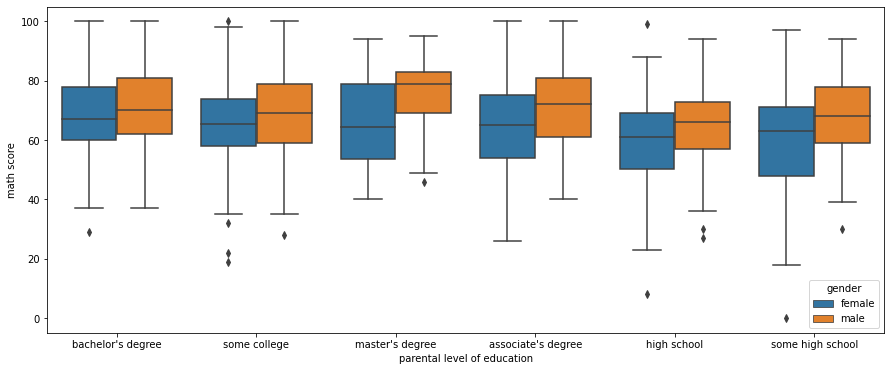

In [84]:
sns.boxplot(y="math score", data=df, x="parental level of education", hue="gender");

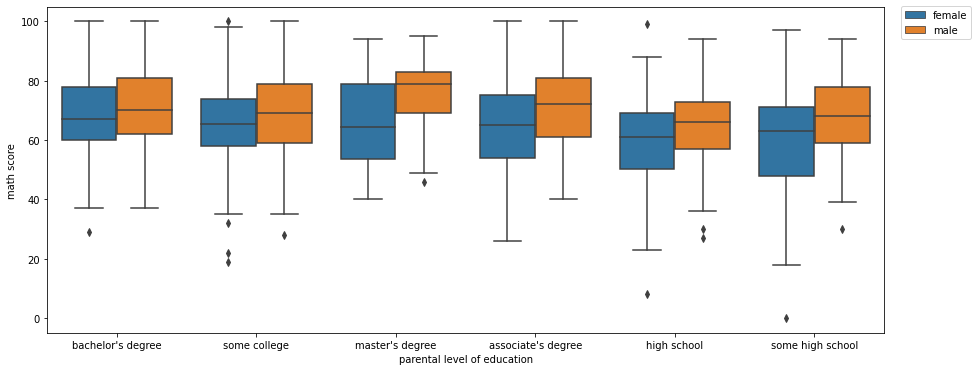

In [87]:
sns.boxplot(y="math score", data=df, x="parental level of education", hue="gender")
plt.legend(loc=(1.02,0.9));

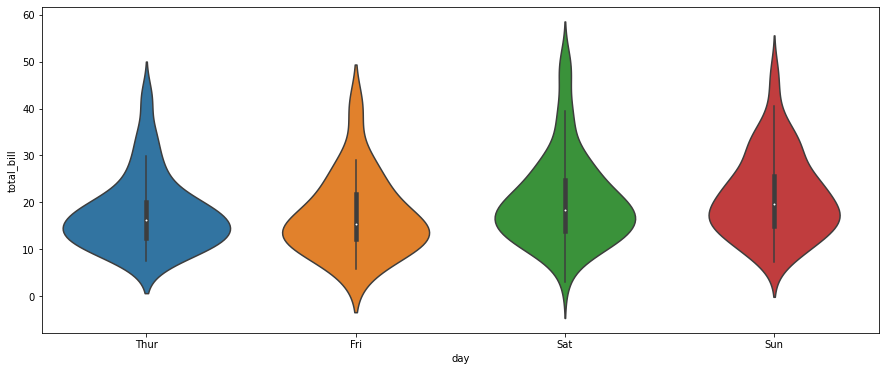

In [88]:
sns.violinplot(x="day", y="total_bill", data=tips);

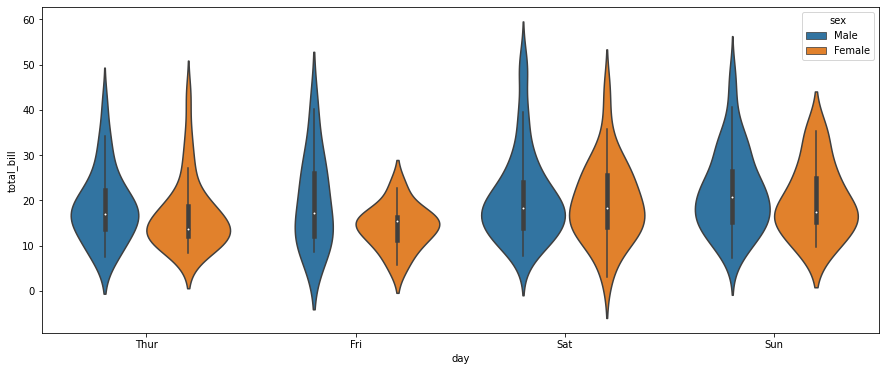

In [89]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex");

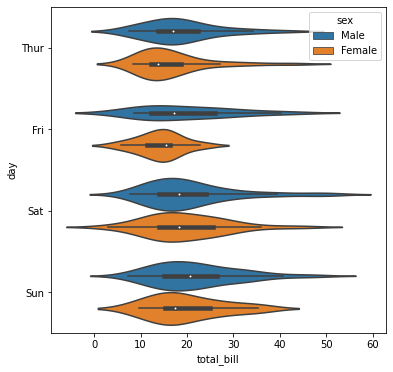

In [91]:
plt.figure(figsize=(6,6))
sns.violinplot(y="day", x="total_bill", data=tips, hue="sex");

In [92]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


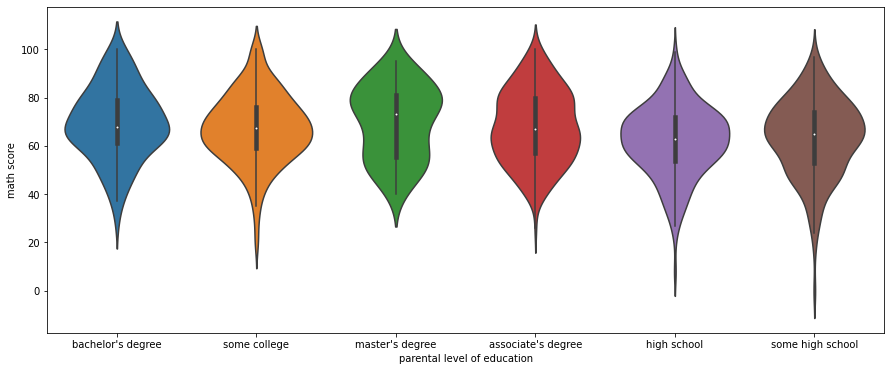

In [93]:
sns.violinplot(x="parental level of education", y="math score", data=df);

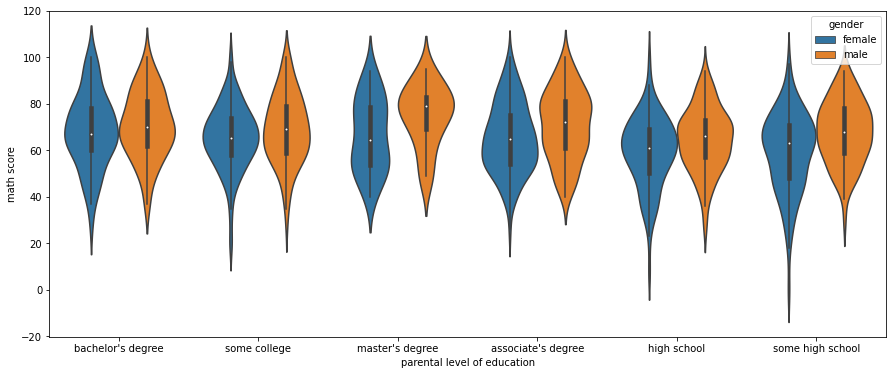

In [94]:
sns.violinplot(x="parental level of education", y="math score", data=df, hue="gender");

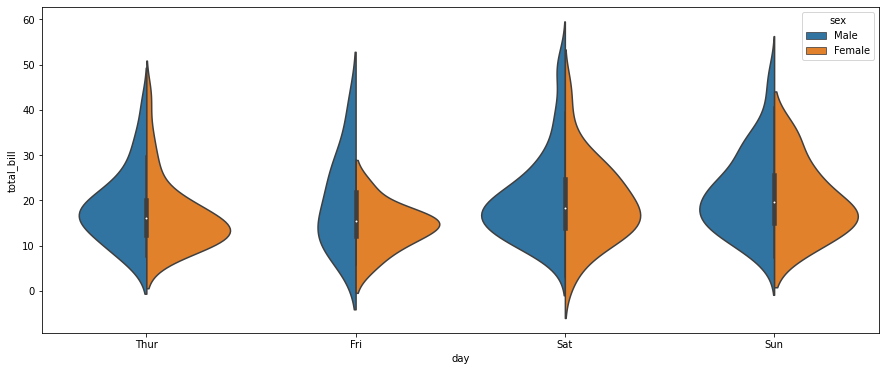

In [96]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", split=True);

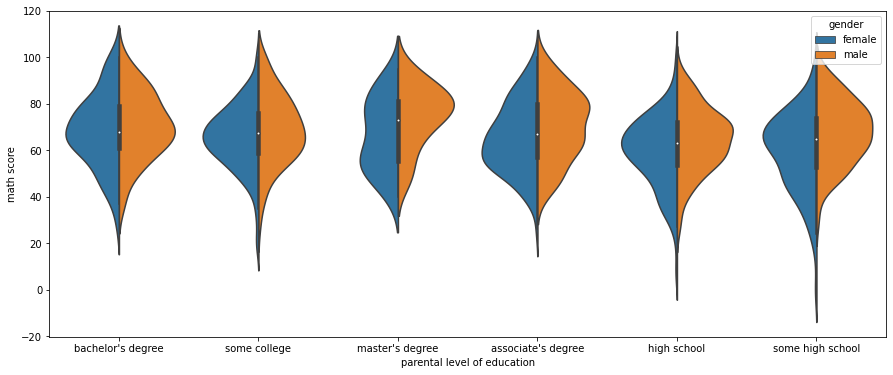

In [97]:
sns.violinplot(x="parental level of education", y="math score", data=df, hue="gender", split=True);

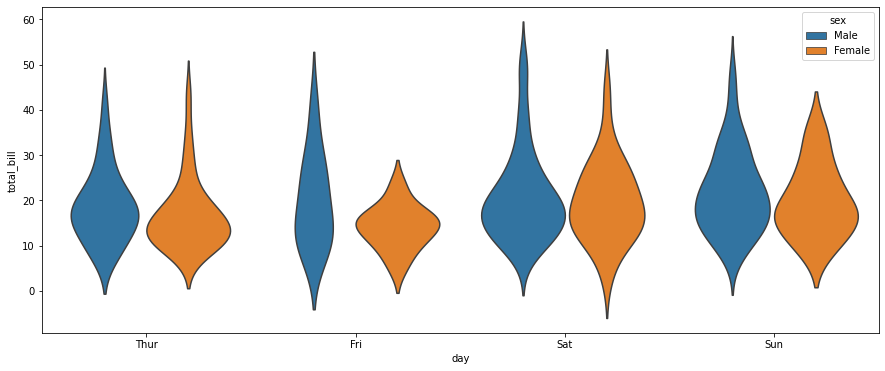

In [98]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", inner=None);

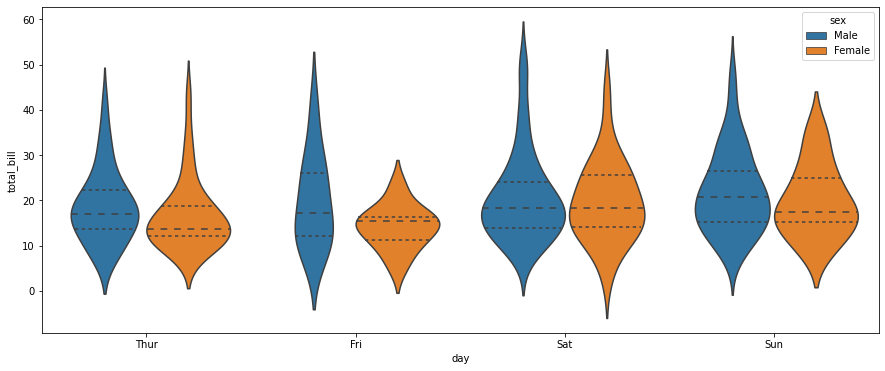

In [99]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", inner="quartile");

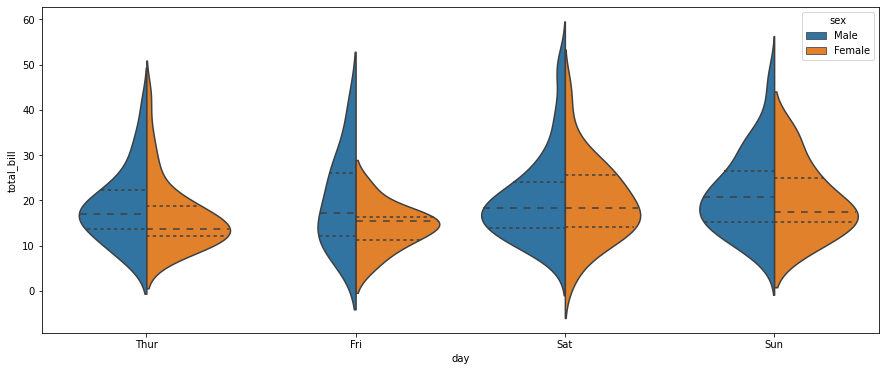

In [102]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", inner="quartile", split=True);

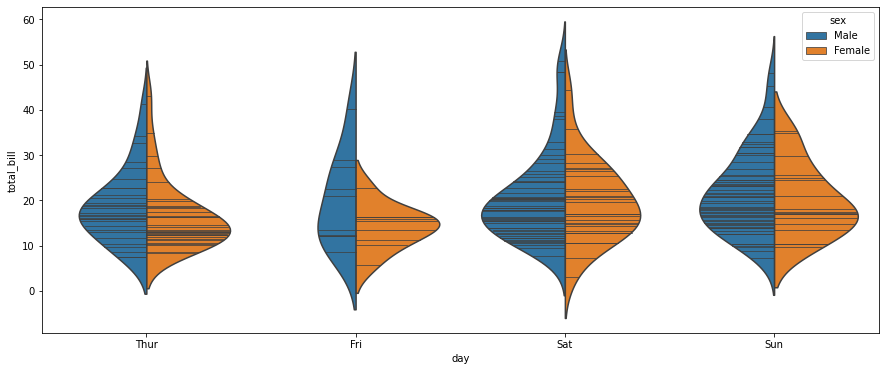

In [103]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", inner="stick", split=True);

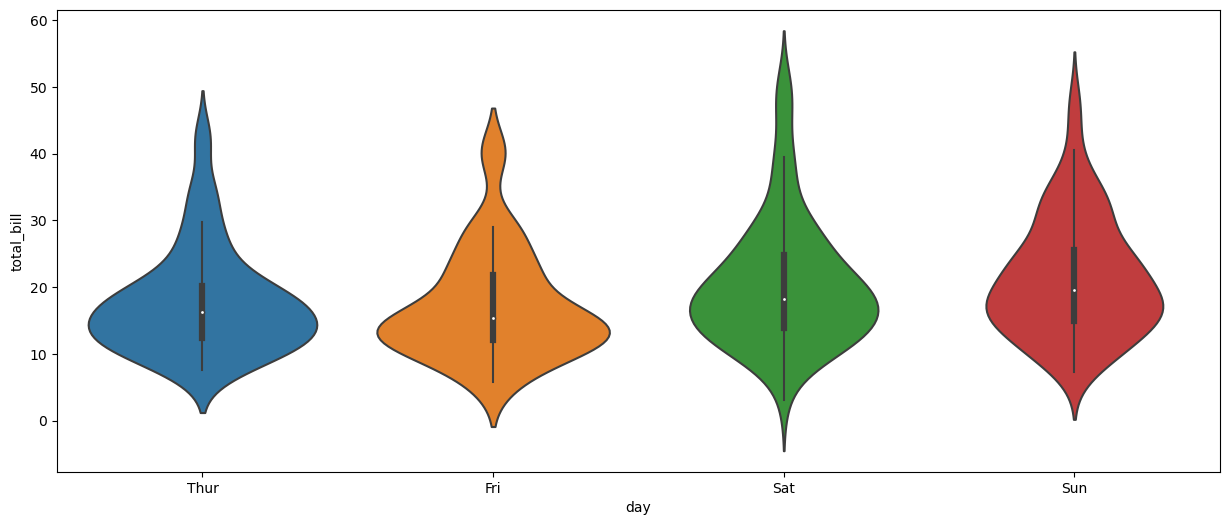

In [26]:
sns.violinplot(x="day", y="total_bill", data=tips, bw=0.4);

In [105]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


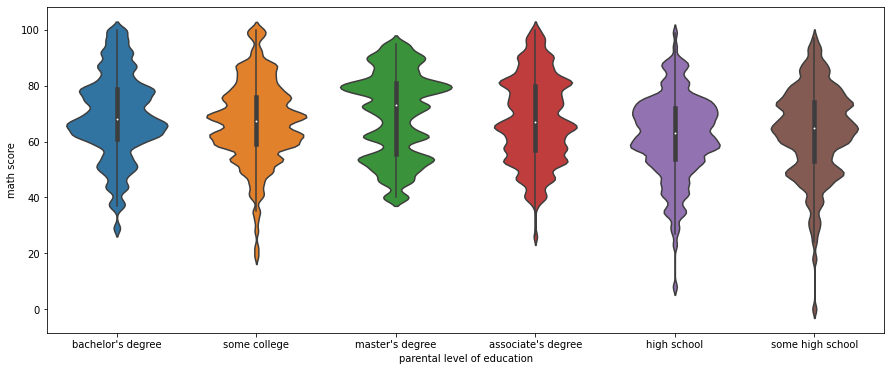

In [108]:
sns.violinplot(x="parental level of education", y="math score", data=df, bw=0.1);

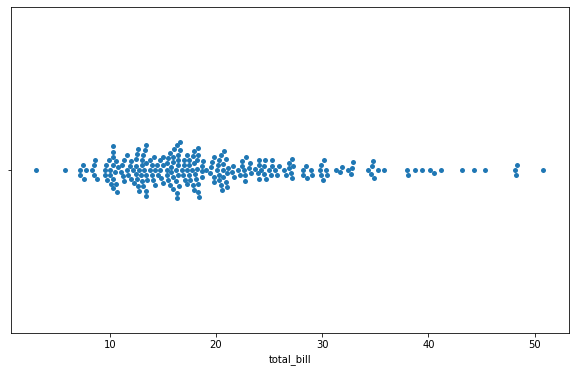

In [110]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="total_bill", data=tips);

C:\Users\memin\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3543: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


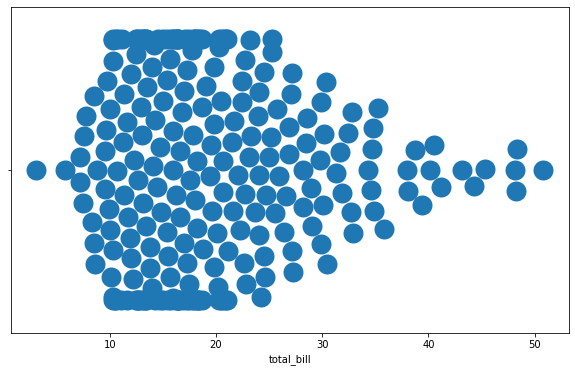

In [112]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="total_bill", data=tips, size=20);

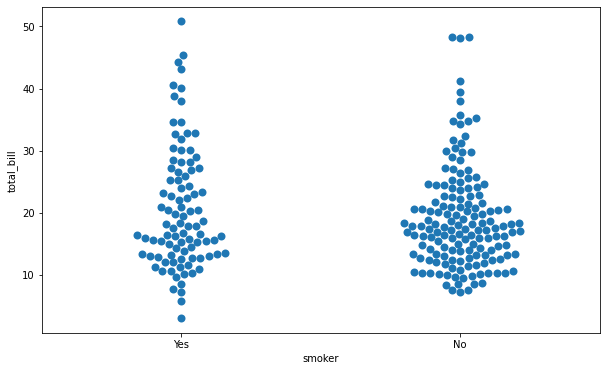

In [115]:
plt.figure(figsize=(10,6))
sns.swarmplot(y="total_bill", data=tips, x="smoker", size=8);

In [116]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


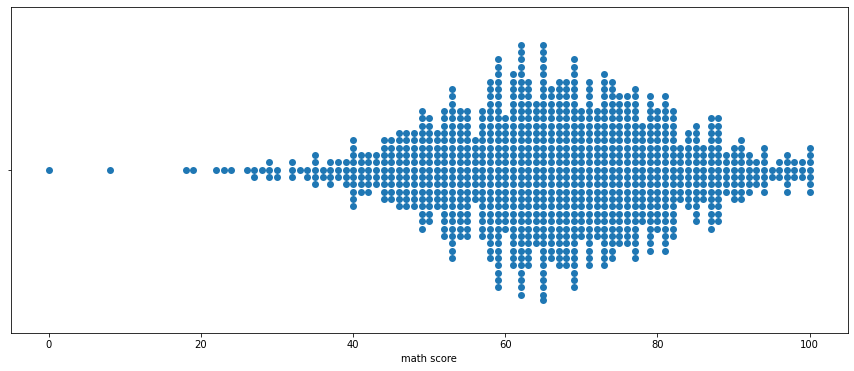

In [119]:
sns.swarmplot(x="math score", data=df, size=7);

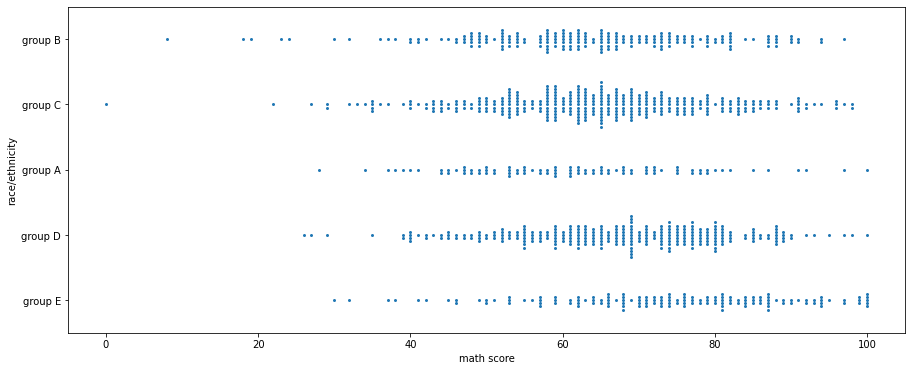

In [121]:
sns.swarmplot(x="math score", data=df, y="race/ethnicity", size=3);

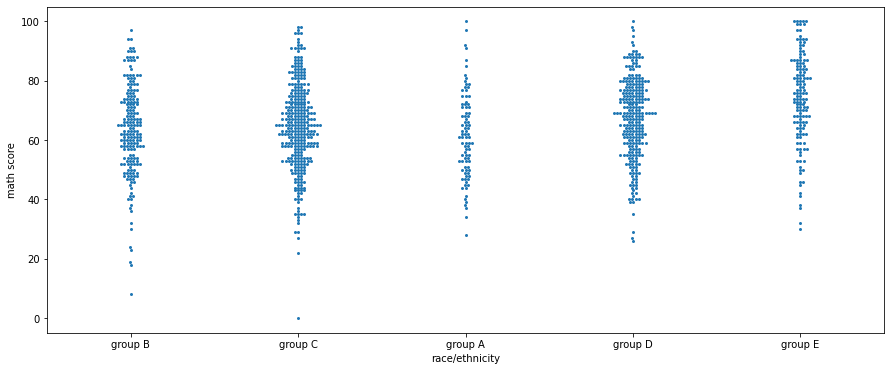

In [122]:
sns.swarmplot(y="math score", data=df, x="race/ethnicity", size=3);

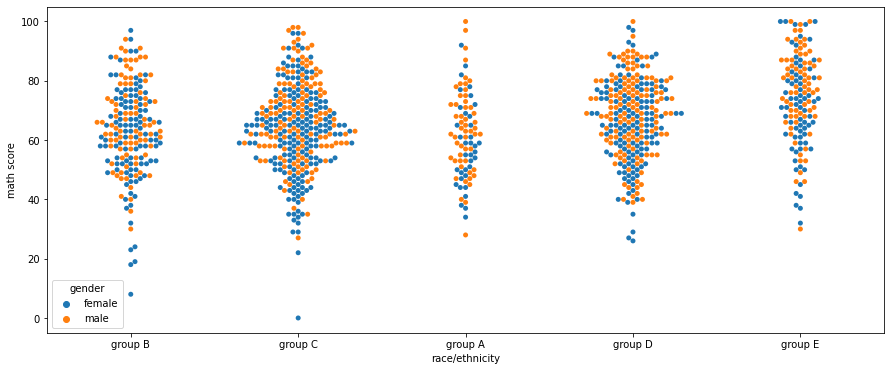

In [124]:
sns.swarmplot(y="math score", data=df, x="race/ethnicity", hue="gender");

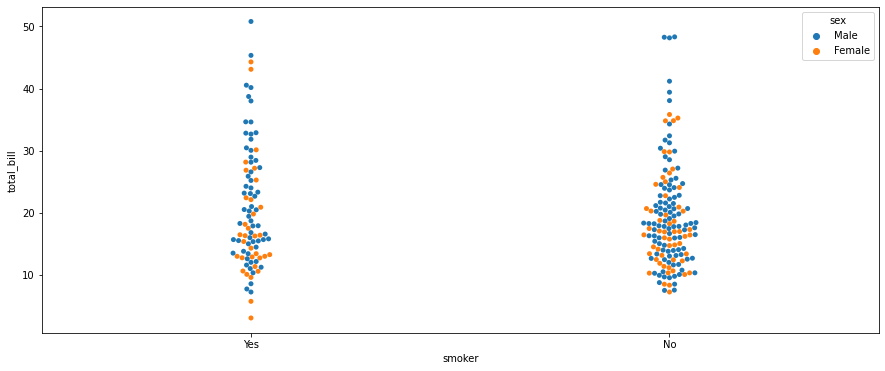

In [125]:
sns.swarmplot(x="smoker", y="total_bill", data=tips, hue="sex");

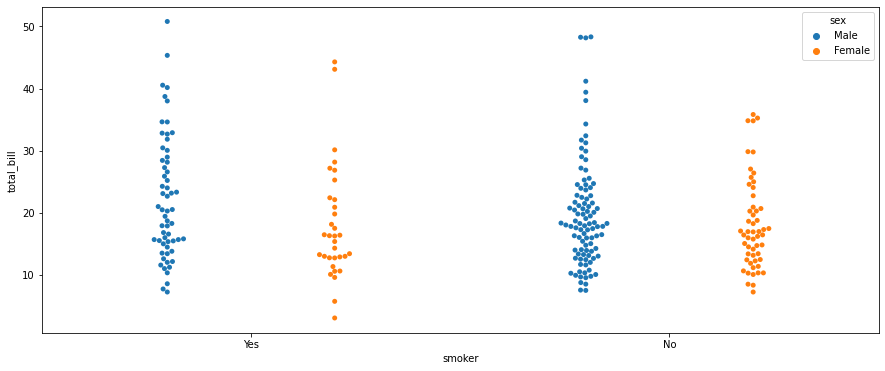

In [126]:
sns.swarmplot(x="smoker", y="total_bill", data=tips, hue="sex", dodge=True);

In [127]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


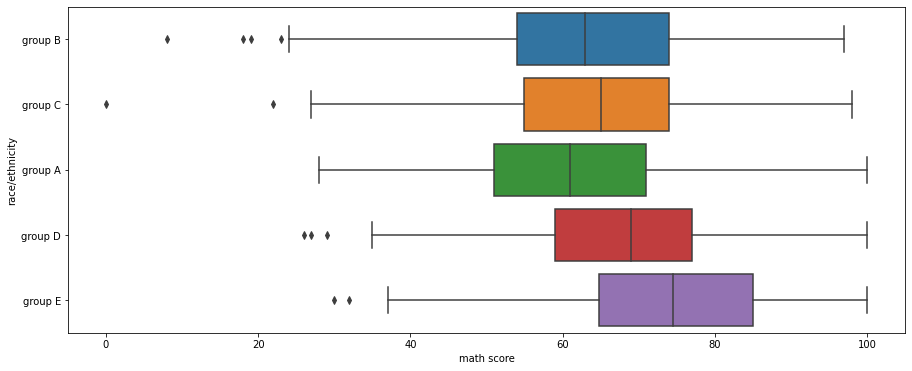

In [128]:
sns.boxplot(x="math score", y="race/ethnicity", data=df);

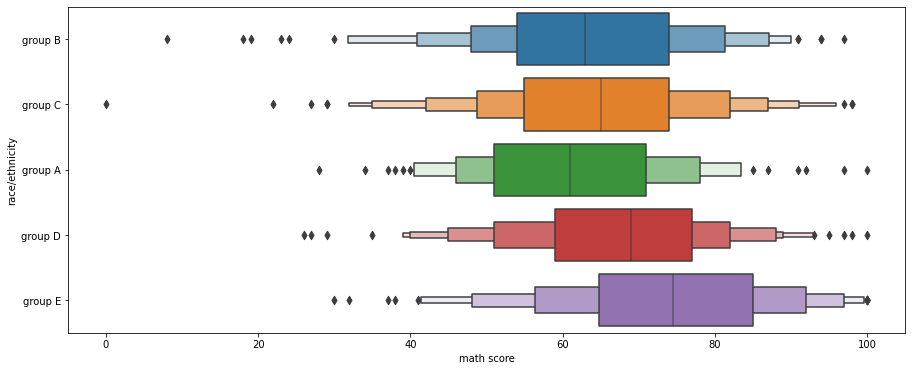

In [129]:
sns.boxenplot(x="math score", y="race/ethnicity", data=df);

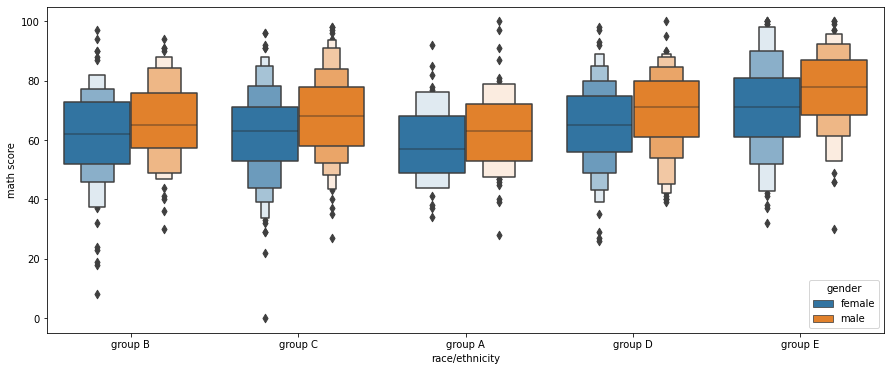

In [130]:
sns.boxenplot(y="math score", x="race/ethnicity", data=df, hue="gender");

In [131]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


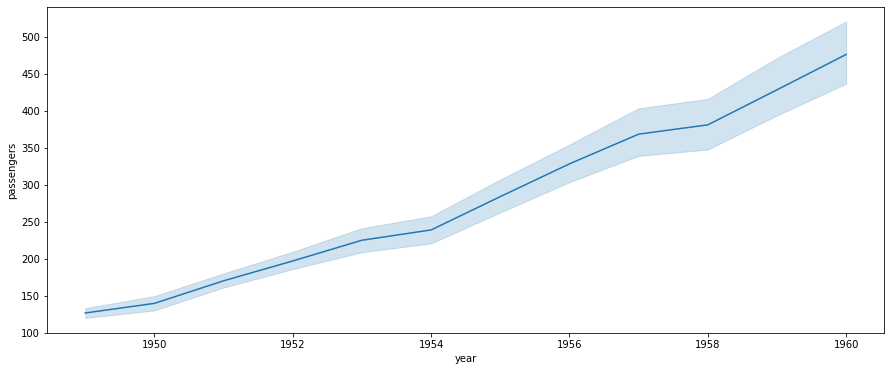

In [132]:
sns.lineplot(x="year", y="passengers", data=flights);

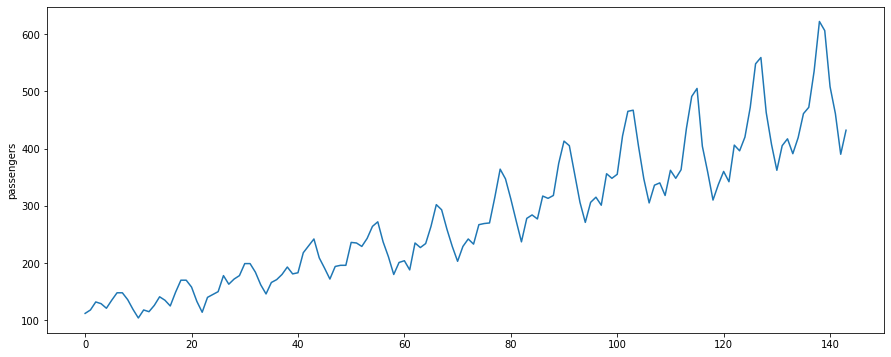

In [133]:
sns.lineplot(y=flights.passengers, x=flights.index);

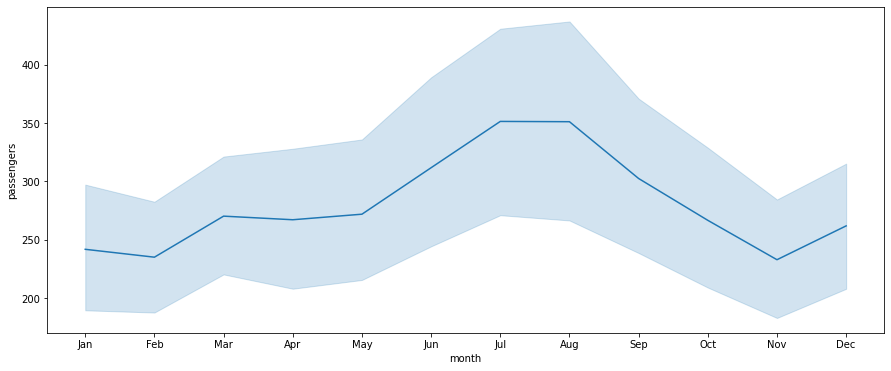

In [134]:
sns.lineplot(x='month', y="passengers", data=flights);

In [137]:
flights[flights["month"]=="May"]

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229
64,1954,May,234
76,1955,May,270
88,1956,May,318
100,1957,May,355
112,1958,May,363


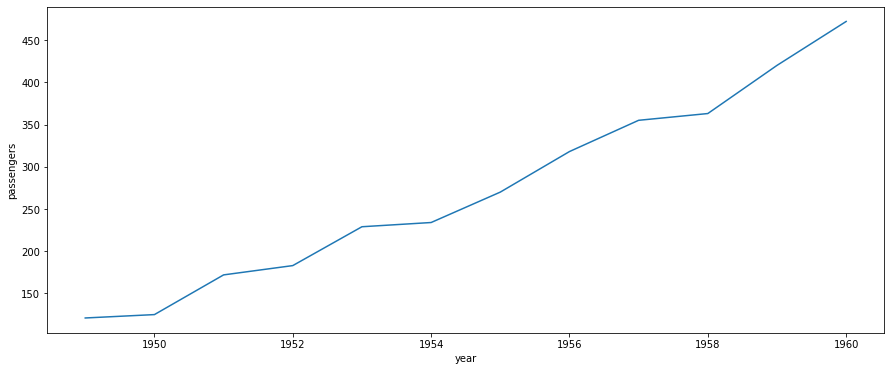

In [138]:
sns.lineplot(data=flights[flights["month"]=="May"], x="year", y="passengers");

In [140]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


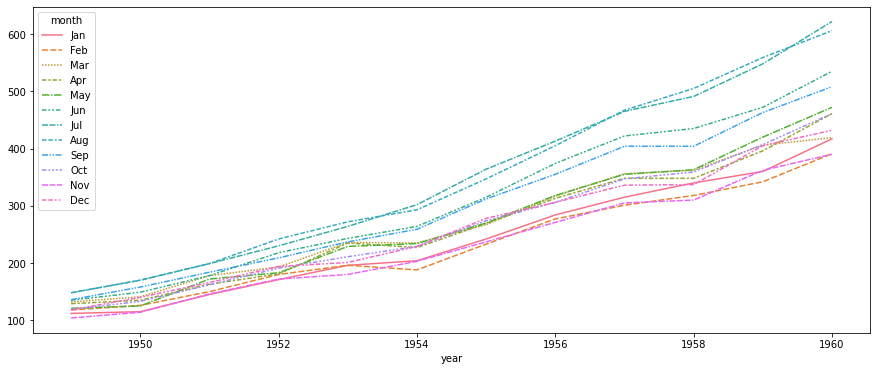

In [141]:
sns.lineplot(data=flights_wide);

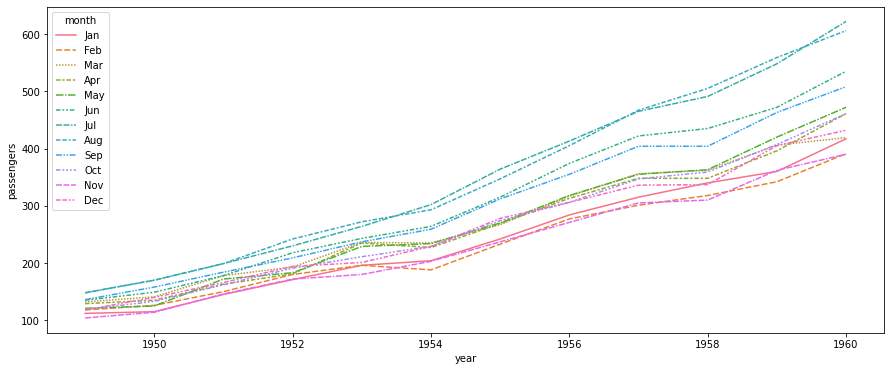

In [143]:
sns.lineplot(x="year", y="passengers", data=flights, hue="month", style="month");

In [146]:
flights_wide.T

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


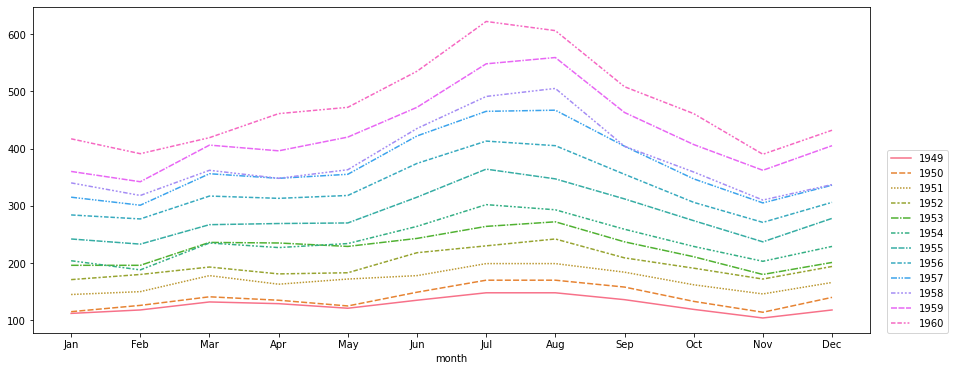

In [145]:
sns.lineplot(flights_wide.T)
plt.legend(loc=(1.02,0));